 # TP : découverte des arbres de décision
---

|   |   |   |
|---|---|---|
|  | | <img src="https://perso.isima.fr/~yjdaniel/cours/resources/arbre.png" width="500" height="300" /> |


---
# Introduction
- Vous pouvez (hmmm devez ?) ajouter des blocs de code comme des blocs d'explication.
- Pensez à sauvegarder régulièrement
- Il est posible de créer une copie locale de votre travail ```file / Download Notebook```. Il est alors possible de travailler en local après avoir installé un serveur Jupyter ainsi que les bibliothèques nécessaires.

Les principaux points abordés dans ce TP sont :
- La construction des ensembles à manipuler (apprentissage, validation, test)
- La visualisation des données
- Le choix des critères de séparation pour la création d'un arbre de décision
  + cas où la séparation peut s'effectuer sur un unique attribut
  + cas où la sépararation est linéaire, mais doit faire intervenir plusieurs attributs
- La construction de l'arbre
- Le jugement de la qualité de l'apprentissage
- Découverte de sklearn
- Introduction aux 'random forests'

---
---
# Avant l'apprentissage
---
---

---
# Préparation de l'environnement

## Charger les librairies 
- numpy
- pandas
- seaborn
- matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Import Complete')

Import Complete


 ## Charger la base de données 'Student alcohol consumption' dans l'environnement
 - Commencer par incorporer la BD dans le kernel : *add data* dans la 'frame' de droite
 - Utiliser la commande pandas permettant de charger le fichier CSV student-mat des données (attention à l'indexage !)
 - N'oubliez pas de vérifier l'apparence du résultat en affichant les premières lignes
 
Rappel : les données se trouvent dans "../input/", dont on peut lister le contenu par :
 ```
import os
print(os.listdir("../input/"))
```
 

In [3]:
import os
print(os.listdir("../input/"))
filepath = '../input/student-alcohol-consumption/student-mat.csv'
data_cons = pd.read_csv(filepath)
data_cons.head()

['student-alcohol-consumption']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
# Découverte et préparation de la base
- Lister les 3 premières lignes (préférer```display```  à ```print```)

In [4]:
display(data_cons.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


- Afficher le nombre de lignes ainsi que le nombre de colonnes

In [5]:
print('Le nombre de lignes = ', len(data_cons.index))
print('Le nombre de colonnes = ', len(data_cons.columns))

Le nombre de lignes =  395
Le nombre de colonnes =  33


- Afficher les types des attributs + nombre de données manquantes par attribut

In [6]:
data_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Afficher un résumé statistique simple de cette base

In [7]:
display(data_cons.describe())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- Pour chaque attribut non continu, lister les valeurs possibles

In [8]:
for col in data_cons.columns:
    if data_cons[col].dtype != "int64" :
        display(f"{col} : {data_cons[col].unique()}")

"school : ['GP' 'MS']"

"sex : ['F' 'M']"

"address : ['U' 'R']"

"famsize : ['GT3' 'LE3']"

"Pstatus : ['A' 'T']"

"Mjob : ['at_home' 'health' 'other' 'services' 'teacher']"

"Fjob : ['teacher' 'other' 'services' 'health' 'at_home']"

"reason : ['course' 'other' 'home' 'reputation']"

"guardian : ['mother' 'father' 'other']"

"schoolsup : ['yes' 'no']"

"famsup : ['no' 'yes']"

"paid : ['no' 'yes']"

"activities : ['no' 'yes']"

"nursery : ['yes' 'no']"

"higher : ['yes' 'no']"

"internet : ['no' 'yes']"

"romantic : ['no' 'yes']"

- Remplacer les colonnes G1, G2, G3 par une nouvelle colonne G, valant la moyenne de G1, G2, G3

In [9]:
my_df = data_cons
def moyenne(row):
    return round((row.G1 + row.G2 + row.G3)/3, 2)
my_df['G'] = my_df.apply(moyenne, axis=1)
my_df = my_df.drop(['G1', 'G2', 'G3'], axis=1)
my_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.67


- Remplacer les valeurs de G en suivant la règle suivante :
  - $x <8$ --> "A"
  - $8 \leq x<10$ --> "B"
  - $10 \leq x <13$ --> "C"
  - $13 \leq x<16$ --> "D"
  - $ x \geq 16$ --> "E"

In [10]:
def remplacer(ligne):
    if int(ligne.G) < 8:
        return "A"
    if int(ligne.G)>=8 and int(ligne.G)<10 :
        return "B"
    if int(ligne.G)>=10 and int(ligne.G)<13:
        return "C"
    if int(ligne.G)>=13 and int(ligne.G)<16:
        return "D"
    else:
        return "E"

my_df["G"] = my_df.apply(remplacer, axis="columns")


In [11]:
my_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,A
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,A
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,D
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,B


- Compter le nombre de ligne pour chacune des valuations possibles de l'attribut "G". Dans la suite, le but du TP sera de prédir en fonction es autres attributs la valeur de l'attribut G.

In [12]:
display(my_df.G.value_counts())
    

C    117
D     85
A     82
B     82
E     29
Name: G, dtype: int64

- Calculer l'effectif de chacune des classes

# Séparation de la base de données
- Lire le manuel de ```sklearn.model_selection.train_test_split```
  - Examiner en particulier l'option stratify, il faudra la mettre en oeuvre
  - Se poser la question de l'intérêt de random_state
- A l'aide de cette séparer la base de données en trois ensembles :
    - base d'apprentissage (50% des données) : train_X, train_Y
    - base de validation (25% des données) : validation_X, validation_Y
    - base de test (25% des données) : test_X, test_Y
- Rappeler la fonction de chacune de ces bases.

!!! Dans la suite, choisir avec attention sur quelle base les opérations doivent être réalisées !!!

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = my_df.drop(columns = 'G')
Y = my_df.G
#Training Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, stratify = Y)
#Validation Set
X_test, X_validation, Y_test, Y_validation  = train_test_split(X_test, Y_test, test_size = 0.5, stratify = Y_test)


In [15]:
display(X_test, Y_test)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,no,yes,yes,4,3,3,2,3,3,3
260,GP,F,18,U,GT3,T,4,3,services,other,...,yes,yes,yes,3,1,2,1,3,2,21
155,GP,M,15,R,GT3,T,2,3,at_home,services,...,yes,no,no,4,4,4,1,1,1,2
238,GP,F,17,R,GT3,T,2,1,at_home,services,...,yes,no,no,2,1,1,1,1,3,2
252,GP,M,18,U,GT3,T,2,1,services,services,...,no,yes,no,3,2,5,2,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,GP,M,19,R,GT3,T,3,3,other,services,...,yes,no,yes,4,5,3,1,2,5,0
342,GP,M,18,U,LE3,T,3,4,services,other,...,yes,yes,yes,4,3,3,1,3,5,11
356,MS,F,17,R,GT3,T,4,4,teacher,services,...,yes,yes,no,4,3,3,1,2,5,4
124,GP,F,16,U,GT3,T,2,2,other,other,...,yes,yes,yes,5,4,4,1,1,5,0


371    C
260    E
155    B
238    C
252    A
      ..
308    D
342    D
356    C
124    A
170    A
Name: G, Length: 99, dtype: object

---
---
# Mise en place manuelle d'un arbre de décision
---
---

---
# Première découpe

## Pour chaque attribut
Représenter sur le même graphique la distribution des exemples en fonction de leur classe. On choisira un sns.histplot que l'on configurera au mieux.

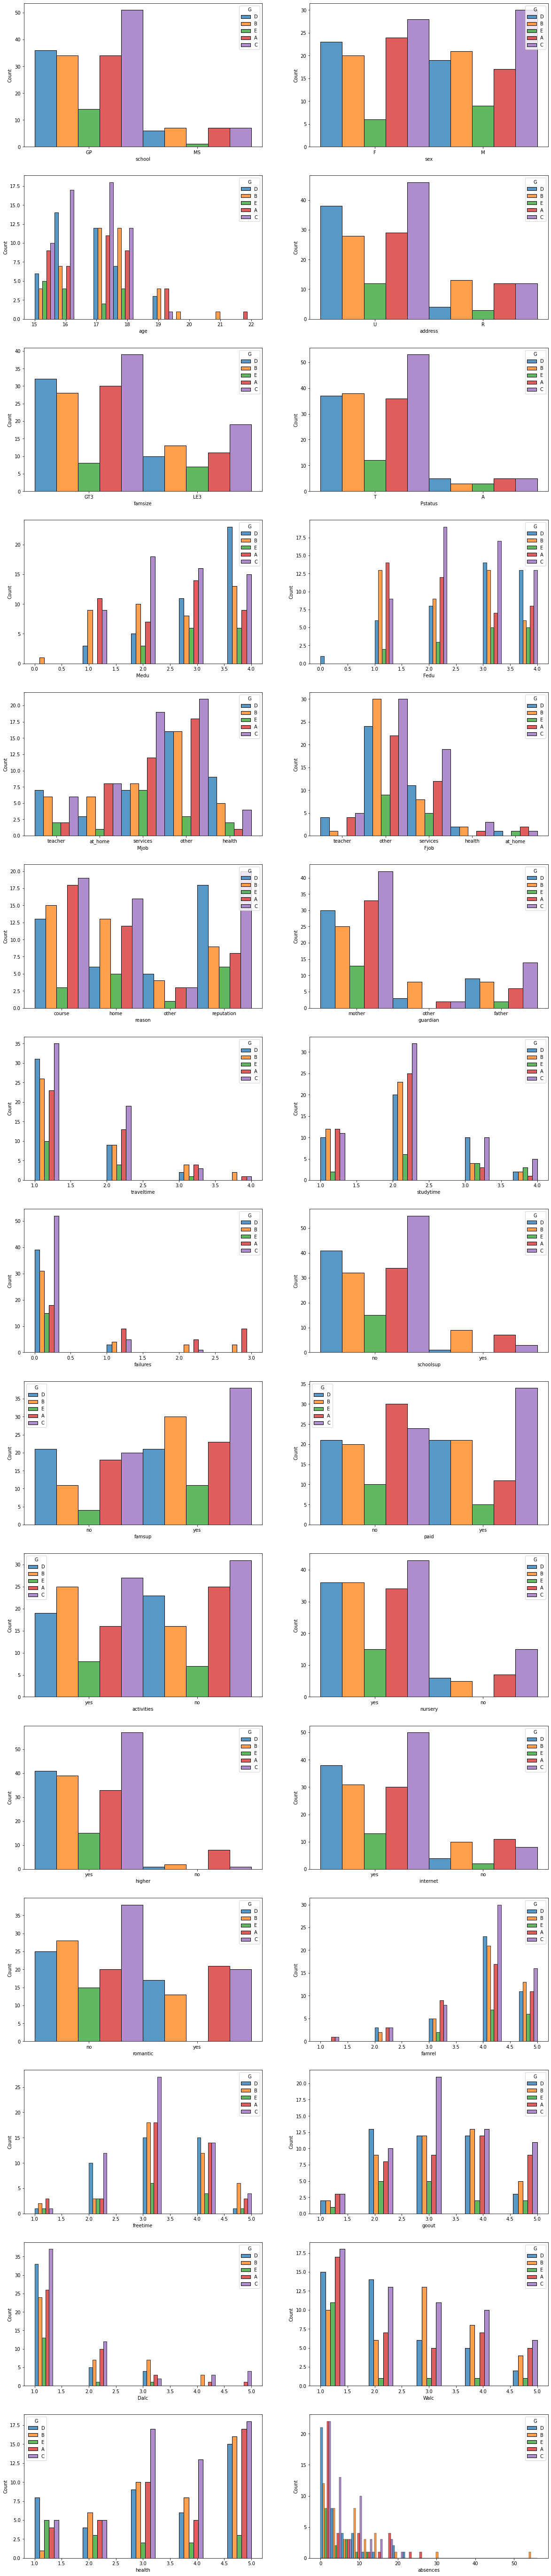

In [16]:
plt.figure(figsize = (20, 100))
compteur = 1
for c in X_train.columns:
    plt.subplot(15,2,compteur)
    plt.xlabel(c)
    sns.histplot(data = X_train, x = c, hue=Y_train, multiple="dodge")
    compteur = compteur+1

- Analyser les conséquences sur chacun des graphiques de réaliser un arbre de décision dont la racine utiliserait cet attribut afin de réaliser la première séparation.
Exemple : Si on séparait sur le critère de l'école, 
   - les deux branches seraient d'effectifs très déséquilibrées
   - on aurait peu d'informations nouvelle sur les 'GP' (la plus nombreuse)
   - sur les 'MS' la proportion de 'C' aurait augmenté par rapport à toutes les autres classes, et en particulier les proportions de B C E auraient particulièrement baissé.

In [17]:
X_train.freetime

139    3
127    4
338    3
115    4
175    4
      ..
27     2
84     3
281    4
355    3
15     4
Name: freetime, Length: 197, dtype: int64

<AxesSubplot:xlabel='goout', ylabel='Count'>

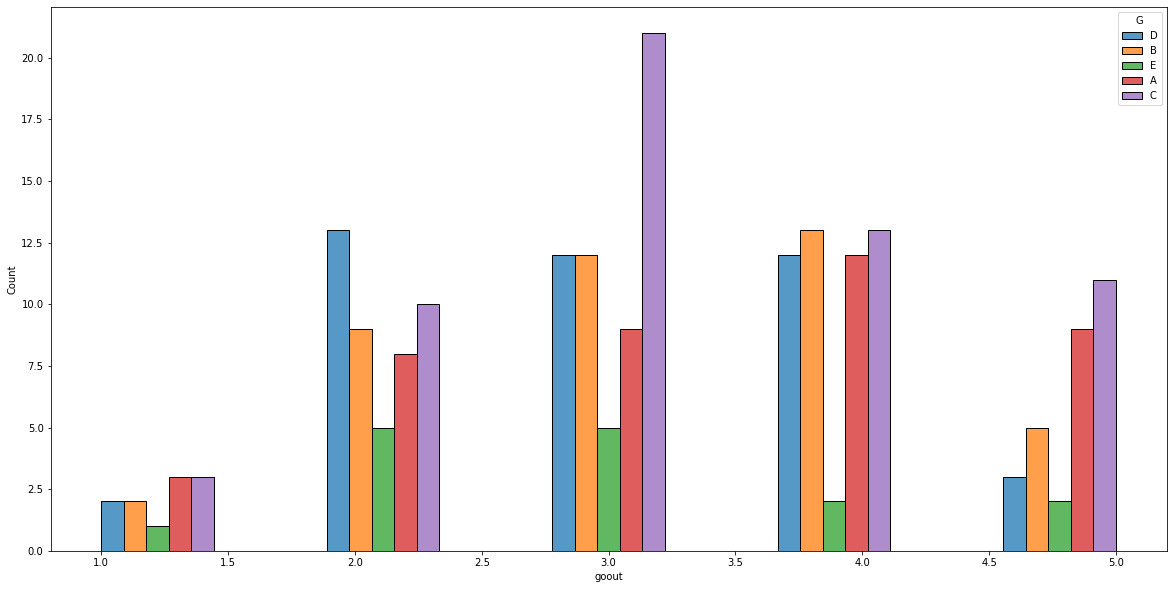

In [18]:
plt.figure(figsize = (20,10))
sns.histplot(data = X_train, x = X_train.goout, hue = Y_train, multiple='dodge')

- Choisir un attribut et une façon de scinder en deux cet attribut, par exemple :
Je choisi l'attribut 'activities freetime' car .... le côté gauche est défini par $\leq 4$ et le côté droit par $>4$

In [19]:
def scinder(row):
    return 'A' if row.goout < 4 else 'B'
X_train['goout'] = X_train.apply(scinder, axis=1)

- Créer deux nouveau dataframes 'd0' et 'd1' correspondant respectivement aux exemples du côté gauche et au exemples du côté droit.

In [20]:
d0 = X_train[X_train.goout == 'A'].sort_index()
d1 = X_train[X_train.goout == 'B'].sort_index()

In [21]:
display(d0.head(), d1.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,A,1,2,5,10
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,A,1,1,1,0
11,GP,F,15,U,GT3,T,2,1,services,other,...,yes,yes,no,5,2,A,1,1,4,4
19,GP,M,16,U,LE3,T,4,3,health,other,...,yes,yes,no,3,1,A,1,3,5,4
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,yes,no,4,4,A,1,1,1,0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,B,1,1,3,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,B,1,1,1,6
15,GP,F,16,U,GT3,T,4,4,health,other,...,yes,yes,no,4,4,B,1,2,2,4
18,GP,M,17,U,GT3,T,3,2,services,services,...,yes,yes,no,5,5,B,2,4,5,16
23,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,5,4,B,2,4,5,0


---
# Niveau suivant de l'arbre
- Reprendre les graphiques en se limitant à la base 'd0', qui devra alors être découpée en 'd00' et 'd01'
- Reprendre les graphiques en se limitant à la base 'd1', qui devra alors être découpée en 'd10' et 'd11'

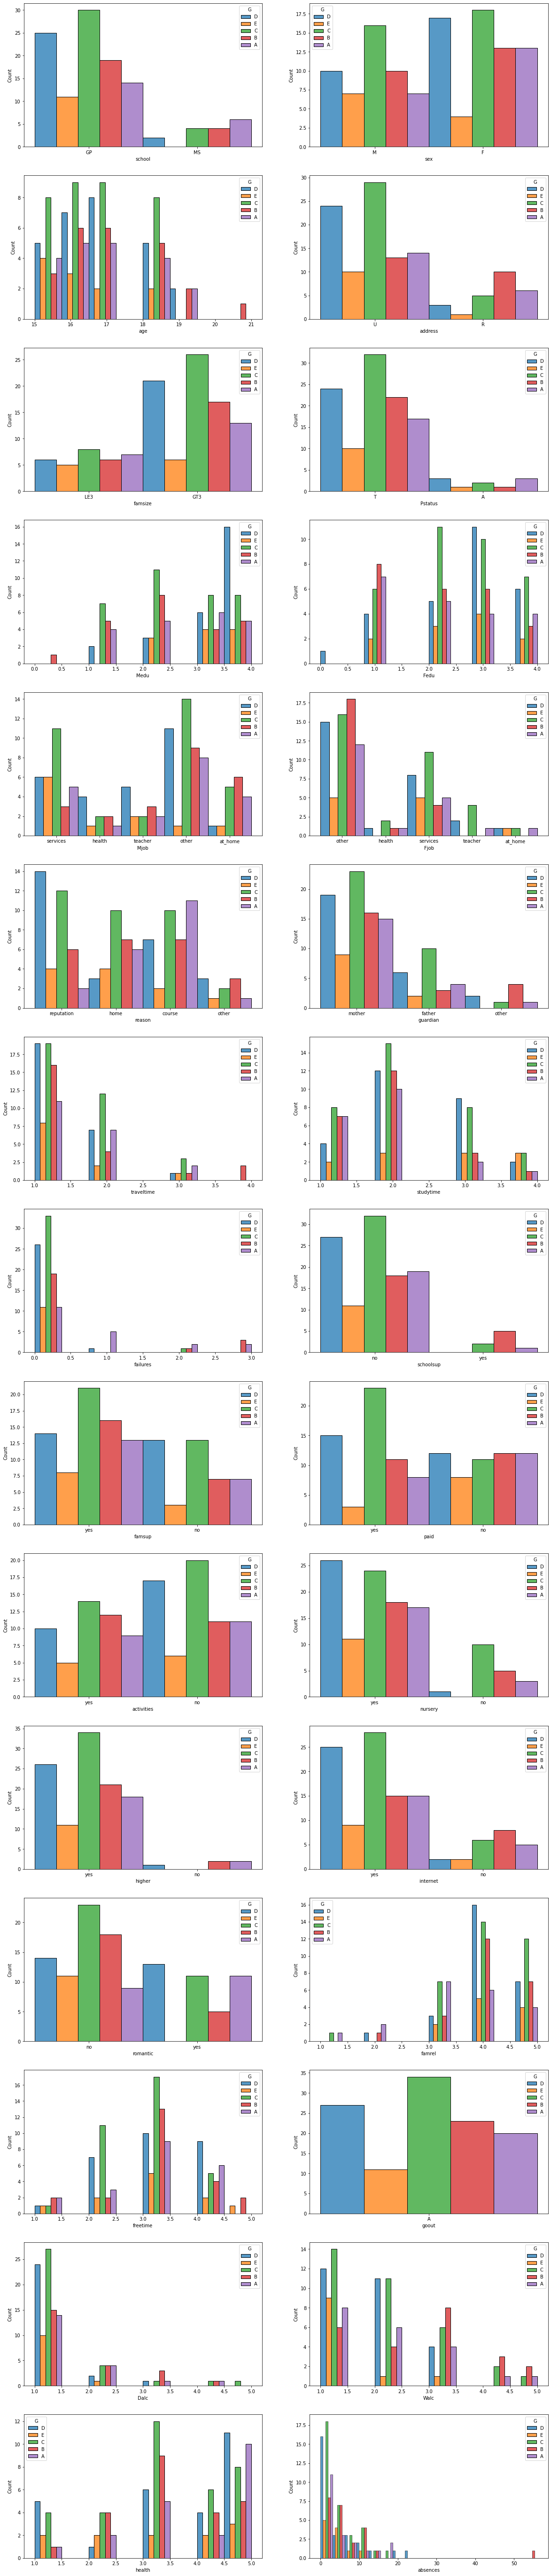

In [23]:
plt.figure(figsize = (20, 100))
compteur = 1
for c in d0.columns:
    plt.subplot(15,2,compteur)
    plt.xlabel(c)
    sns.histplot(data = d0, x = c, hue=Y_train[d0.index], multiple="dodge")
    compteur = compteur+1

On découpe d0 et d1 selon l'atribut 'activities' 

In [24]:
d00 = d0[d0.activities == 'yes']
d01 = d0[d0.activities == 'no']
d10 = d1[d1.activities == 'yes']
d11 = d1[d1.activities == 'no']
display(d00.head(), d11.head())
d00.activities.unique()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,A,1,2,5,10
11,GP,F,15,U,GT3,T,2,1,services,other,...,yes,yes,no,5,2,A,1,1,4,4
19,GP,M,16,U,LE3,T,4,3,health,other,...,yes,yes,no,3,1,A,1,3,5,4
24,GP,F,15,R,GT3,T,2,4,services,health,...,yes,yes,no,4,3,A,1,1,5,2
31,GP,M,15,U,GT3,T,4,4,services,services,...,yes,yes,no,4,3,A,1,1,5,0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,B,1,1,3,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,B,1,1,1,6
15,GP,F,16,U,GT3,T,4,4,health,other,...,yes,yes,no,4,4,B,1,2,2,4
27,GP,M,15,U,GT3,T,4,2,health,services,...,yes,yes,no,2,2,B,2,4,1,4
46,GP,F,16,U,LE3,A,3,3,other,services,...,yes,yes,no,2,3,B,1,4,3,12


array(['yes'], dtype=object)

---
# Fonction de découpe
- Ecrire une fonction qui attribue à une ligne du dataframe 'train' l'ensemble auquel cet élément est assigné, parmi 'd00, d01, d10, d11' (ce sont les feuilles de notre arbdre de décision)
- Déterminer la classe la plus fréquente dans chacun des ensembles 'd00, d01, d10, d11'
- Ecrire une fonction qui associe à une ligne du dataframe la classe majoritaire de l'ensemble auquel il est affecté

In [25]:
def ensemble(row):
    if (row.goout == 'A') & (row.activities == 'yes'):
        return 'd00'
    if (row.goout == 'A') & (row.activities == 'no'):
        return 'd01'
    if (row.goout == 'B') & (row.activities == 'yes'):
        return 'd10'
    if (row.goout == 'B') & (row.activities == 'no'):
        return 'd11'

In [26]:
X_train['ensemble'] = X_train.apply(ensemble, axis=1)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,ensemble
139,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,yes,no,4,3,A,1,1,5,0,d00
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,no,3,4,A,1,1,5,2,d01
338,GP,F,18,U,LE3,T,3,3,services,services,...,yes,no,5,3,A,1,1,1,7,d01
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,yes,no,5,4,B,1,2,5,2,d10
175,GP,M,17,U,LE3,T,4,3,teacher,other,...,yes,no,4,4,B,4,4,4,4,d10


In [27]:
def majoritaire():
    dfs = [d00, d01, d10, d11]
    classe_majoritaire = []
    
    for element in dfs:
        classe_majoritaire.append(Y_train[element.index].value_counts().index[0])
    return classe_majoritaire

print('les classes majoritaire',majoritaire())

les classes majoritaire ['C', 'C', 'C', 'A']


In [28]:
df_majoritaire = {}
classe = majoritaire()
dfs= ['d00', 'd01', 'd10', 'd11']
for i in range(len(classe)):
    df_majoritaire[dfs[i]] = classe[i]
df_majoritaire  

{'d00': 'C', 'd01': 'C', 'd10': 'C', 'd11': 'A'}

In [29]:
def attribuer_classe(row):
    return df_majoritaire[row.ensemble]
X_train['classe'] = X_train.apply(attribuer_classe,  axis=1)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,ensemble,classe
139,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,no,4,3,A,1,1,5,0,d00,C
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,3,4,A,1,1,5,2,d01,C
338,GP,F,18,U,LE3,T,3,3,services,services,...,no,5,3,A,1,1,1,7,d01,C
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,no,5,4,B,1,2,5,2,d10,C
175,GP,M,17,U,LE3,T,4,3,teacher,other,...,no,4,4,B,4,4,4,4,d10,C


---
# Qualité de l'arbre
- Sachant que  nous allons essayer d'autres façons de réaliser l'apprentissage, sur quel ensemble doit-on réaliser la mesure de la qualité de l'arbre ainsi créé ?
- On choisit comme mesure de qualité le taux de bonnes prédictions (accuracy), le calculer.
- représenter la matrice de confusion

In [30]:
from sklearn import metrics

In [31]:
accuracy = round(metrics.accuracy_score(Y_train, X_train.classe),4)
print('Accuracy = ', accuracy*100,'%')
metrics.confusion_matrix(Y_train, X_train.classe)

Accuracy =  30.959999999999997 %


array([[14,  0, 27,  0,  0],
       [ 5,  0, 36,  0,  0],
       [11,  0, 47,  0,  0],
       [ 6,  0, 36,  0,  0],
       [ 1,  0, 14,  0,  0]])

**ACCURACY TROP FAIBLE !**

---
# Arbre de décision réalisés par sklearn
---
- importer le module ```tree``` de ```sklearn```
- Etudier la documentation de ```DecisionTreeClassifier```, en particulier la partie **Tips on practical use**
- Construire un classifieur utilisant l'indice de Gini

Attention : actuellement, les arbres de décision de sklearn ne supportent que les données numériques, il  faudra donc réaliser un prétraitement sur les données afin de transformer les attributs catégoriels en attributs numériques.

In [32]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='gini',random_state=0)

* Extraction des variables categorielles


In [51]:
X_train = X_train.drop(['ensemble', 'classe'], axis=1)

In [52]:
obj = (X_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print('Les variables categorielles :',object_cols)

obj_test = X_test.dtypes == 'object'
object_cols_test = list(obj_test[obj_test].index)


Les variables categorielles : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout']


In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [64]:
X_train_copy = X_train.copy().sort_index()
X_test_copy = X_test.copy().sort_index()
X_validation_copy = X_validation.copy().sort_index()

X_train_copy[object_cols] = OrdinalEncoder().fit_transform(X_train[object_cols])
X_test_copy[object_cols_test] = OrdinalEncoder().fit_transform(X_test_copy[object_cols_test])
X_validation_copy[object_cols_test] = OrdinalEncoder().fit_transform(X_validation_copy[object_cols_test])

display(X_train_copy.head(), X_test_copy.head(), X_validation_copy.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0.0,0.0,18,1.0,0.0,1.0,4,4,4.0,4.0,...,1.0,1.0,0.0,4,3,0.0,1,1,3,6
5,0.0,0.0,16,1.0,0.0,1.0,4,3,0.0,2.0,...,0.0,0.0,0.0,5,4,0.0,1,2,5,10
7,0.0,0.0,17,1.0,1.0,1.0,4,4,3.0,3.0,...,1.0,1.0,0.0,4,1,0.0,1,1,1,6
8,0.0,1.0,15,1.0,0.0,1.0,3,2,4.0,4.0,...,1.0,1.0,0.0,4,2,1.0,1,1,1,0
11,0.0,1.0,15,1.0,1.0,1.0,2,1,4.0,2.0,...,1.0,1.0,0.0,5,2,1.0,1,1,4,4


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,1.0,1.0,0.0,5,3,3,1,1,3,4
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,1.0,1.0,0.0,4,3,2,2,3,3,10
6,0.0,1.0,16,1.0,1.0,1.0,2,2,2.0,2.0,...,1.0,1.0,0.0,4,4,4,1,1,3,0
12,0.0,1.0,15,1.0,1.0,1.0,4,4,1.0,3.0,...,1.0,1.0,0.0,4,3,3,1,3,5,2
13,0.0,1.0,15,1.0,0.0,1.0,4,3,4.0,2.0,...,1.0,1.0,0.0,5,4,3,1,2,3,2


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,1.0,1.0,1.0,3,2,2,1,1,5,2
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,1.0,0.0,0.0,4,3,2,1,2,5,4
9,0.0,1.0,15,1.0,0.0,1.0,3,4,2.0,2.0,...,1.0,1.0,0.0,5,5,1,1,1,5,0
10,0.0,0.0,15,1.0,0.0,1.0,4,4,4.0,1.0,...,1.0,1.0,0.0,3,3,3,1,2,2,0
14,0.0,1.0,15,1.0,0.0,0.0,2,2,2.0,2.0,...,1.0,1.0,1.0,4,5,2,1,1,3,0


Nous avons gérer toutes les variables catégorielles

In [65]:
my_decision_tree = tree_model.fit(X_train_copy, Y_train)

# Qualité

- calculer la matrice de confusion
- calculer les scores usuels de ce classifieur
- à l'aide de la fonction ```plot_confusion_matrix``` de sklearn, représenter graphiquement la matrice de confusion
- Comparer les scores à ceux obtenus par un classifieur 'bidon' (sklearn.dummy) (à quoi cela sert-il ?)

Rq : il reste un bug dans dummy, si vous obtenez une erreur de type 'no argmax on list', un contournement de ce problème peut être obtenu en reformattant les entrées du classifieur par 'check_X_y'


In [69]:
display(X_train_copy.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0.0,0.0,18,1.0,0.0,1.0,4,4,4.0,4.0,...,1.0,1.0,0.0,4,3,0.0,1,1,3,6
5,0.0,0.0,16,1.0,0.0,1.0,4,3,0.0,2.0,...,0.0,0.0,0.0,5,4,0.0,1,2,5,10
7,0.0,0.0,17,1.0,1.0,1.0,4,4,3.0,3.0,...,1.0,1.0,0.0,4,1,0.0,1,1,1,6
8,0.0,1.0,15,1.0,0.0,1.0,3,2,4.0,4.0,...,1.0,1.0,0.0,4,2,1.0,1,1,1,0
11,0.0,1.0,15,1.0,1.0,1.0,2,1,4.0,2.0,...,1.0,1.0,0.0,5,2,1.0,1,1,4,4


In [84]:
y_predicted = tree_model.predict(X_validation_copy)

In [86]:
metrics.confusion_matrix(Y_validation, y_predicted)

array([[6, 3, 5, 5, 1],
       [8, 5, 1, 6, 1],
       [8, 7, 7, 4, 4],
       [7, 6, 6, 1, 1],
       [4, 1, 2, 0, 0]])

In [87]:
accuracy = metrics.accuracy_score(Y_validation, y_predicted)
accuracy = round(accuracy, 4)
print("la precision de l'arbre = ", accuracy*100,"%")

la precision de l'arbre =  19.189999999999998 %


*** Taux de précision trop faible !!***

---
# Comparaison avec un classifieur primitif
Entrainer un 'dummy' classifieur (```sklearn.dummy.DummyClassifier```), et comparer les mesures du classifieur précédent à ce nouveau classifieur

In [90]:
from sklearn.dummy import DummyClassifier

**Dummy avec la stratégie = 'most_frequent'**

In [98]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train_copy, Y_train)
dummy_clf.predict(X_validation_copy)
print("{0:g}".format(dummy_clf.score(X_validation_copy, Y_validation)))

0.30303


**Dummy avec la stratégie = 'prior'**


In [100]:
dummy_clf = DummyClassifier(strategy = 'prior')
dummy_clf.fit(X_train_copy, Y_train)
dummy_clf.predict(X_validation_copy)
print("{0:g}".format(dummy_clf.score(X_validation_copy, Y_validation)))

0.30303


**Dummy avec la stratégie = 'stratified'**

In [99]:
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_clf.fit(X_train_copy, Y_train)
dummy_clf.predict(X_validation_copy)
print("{0:g}".format(dummy_clf.score(X_validation_copy, Y_validation)))

0.292929


**Conclusion :**
On peut bien remarqué que le Dummy prédit mieux que notre model d'arbre ce qui signifie que notre modéle est vrraiment pourri il faut vite le changer

---
# Représenter un arbre de décision
- Importer le module graphviz
- utiliser la fonction de ```tree.export_graphviz``` puis ```graphviz.Source``` afin de réaliser une belle représentation graphique de l'arbre de décision

In [101]:
import graphviz

In [102]:
dot_data = tree.export_graphviz(my_decision_tree, out_file = None)
graph = graphviz.Source(dot_data)

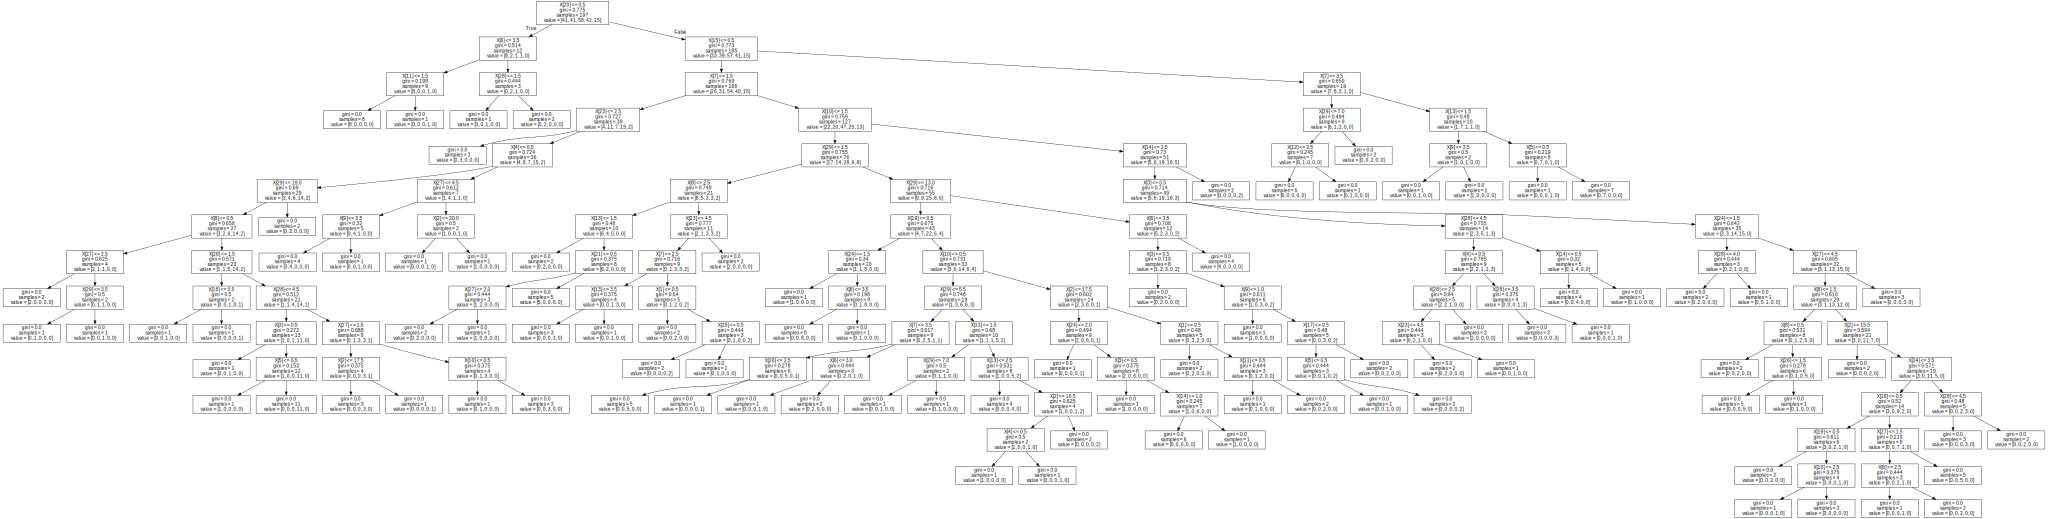

In [103]:
graph

---
# Construction du 'meilleur' arbre de décision
- faire varier les paramètres de construction de l'arbre de décision (bien mettre en pratique les 'Tips')
- choisir l'arbre le 'meilleur' sur l'ensemble de test  

N'oubliez pas le principe du ** rasoir d'Ockham ** pour effectuer votre choix !!!!!

In [141]:
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', random_state = 0)
tree_clf.fit(X_train_copy, Y_train)
tree_clf.score(X_validation_copy, Y_validation)

0.26262626262626265

In [137]:
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 0)
tree_clf.fit(X_train_copy, Y_train)
tree_clf.score(X_validation_copy, Y_validation)

0.21212121212121213

In [142]:
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 0)
tree_clf.fit(X_train_copy, Y_train)
tree_clf.score(X_validation_copy, Y_validation)

0.25252525252525254

---
# Random Forest
---
- Rappeler le principe des forets d'arbres décisionnelles, statquest est votre ami ! 
    - https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
    - https://www.youtube.com/watch?v=nyxTdL_4Q-Q

- Remplacer le classifieur par arbre de décision par un classifieur par une forêt d'arbres décisionnels

**Random Forest** : un ensemble de plusieurs arbres de décision, ayant un nouveau tuple dont on veut prédire la classe: -Il passe par tous les arbes appartenants à la foret -Chaque classe renvoie la classe prédite -Au final on lui attribue la classe ayant le plus de votes

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
randomForest_clf = RandomForestClassifier(n_estimators=100)
randomForest_clf.fit(X_train_copy, Y_train)

RandomForestClassifier()

In [161]:
randomForest_clf.score(X_train_copy, Y_train)

1.0

---
# Livraison
---
Faire les tests finaux afin de connaître la qualité de votre apprentissage, en reprenant les différentes mesures, mais cette fois sur l'ensemble de test.

In [165]:
print("{0:g}".format(randomForest_clf.score(X_validation_copy, Y_validation)))

0.242424


In [166]:
print("{0:g}".format(randomForest_clf.score(X_test_copy, Y_test)))

0.30303


# Merci d'être allé jusqu'à la fin du TP, j'espère que ce travail vous a aidé à approfondir votre compréhension du cours d'apprentissage artificiel.